# Kaggle Introduction: DataCamp Course

course name: Winning a Kaggle Competition in Python

## 0. Workflow of Solution

1) Understanding the problem and competition metrics       
2) EDA       
3) Local validation strategy: prevent overfitting etc.      
4) Modelling: continuous improvement of the solution.        

1) Understanding the problem:     

Determine the *datatype* we are dealing with: tabular data, time series, image, text, etc.      
Determine the *problem type*: classification, regression, ranking etc.     
Familiar with *evaluation metrics*: ROC AUC, F1-score, MAE, MSE etc.     



Define a competition metric
Competition metric is used by Kaggle to evaluate your submissions. Moreover, you also need to measure the performance of different models on a local validation set.       

For now, your goal is to manually develop a couple of competition metrics in case if they are not available in sklearn.metrics.       

In particular, you will define:       

Mean Squared Error (MSE) for the regression problem:        
$MSE = \frac{1}{N}\sum^{N}_{i=1}(y_i - \hat{y}_i)^2$       

Logarithmic Loss (LogLoss) for the binary classification problem:
$LogLoss=-\frac{1}{N} \sum{N}{i=1}(y_i \log p_i + (1 - y_i) \log (1-p_i))$

In [ ]:
# Import MSE from sklearn
from sklearn.metrics import mean_squared_error
# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
  	# Find loss for each observation
    terms = y_true * ____ + (1 - y_true) * ____
    # Find mean over all observations
    err = ____(terms) 
    return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

In [ ]:
# Import log_loss from sklearn
from sklearn.metrics import log_loss
# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
  	# Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms) 
    return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

## 1.New York city taxi fare prediction

Full data from Kaggle as train/test set.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
taxi_train = pd.read_csv("../../../Kaggle_Data/new-york-city-taxi-fare-prediction/train.csv")

In [4]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
taxi_train.shape

(55423856, 8)

In [6]:
taxi_train.columns.to_list()

['key',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [14]:
taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


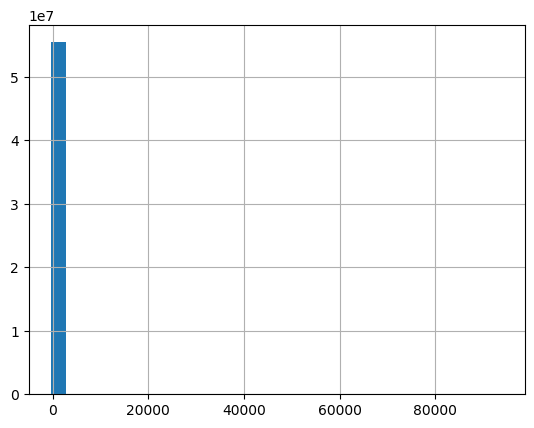

In [29]:
taxi_train["fare_amount"].hist(bins=30)
plt.show()

looks odd, because there are outliers on the far right

In [25]:
taxi_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [16]:
taxi_test = pd.read_csv("../../../Kaggle_Data/new-york-city-taxi-fare-prediction/test.csv")

In [17]:
taxi_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [18]:
taxi_sample_sub = pd.read_csv("../../../Kaggle_Data/new-york-city-taxi-fare-prediction/sample_submission.csv")

In [19]:
taxi_sample_sub.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


## 2. NY City Taxi fare prediction (smaller sample, preprocessed by DataCamp)

In [32]:
taxi_train_prep = pd.read_csv("../DataCamp_Intro/Data/taxi_train_chapter_4.csv")
taxi_test_prep = pd.read_csv("../DataCamp_Intro/Data/taxi_test_chapter_4.csv")

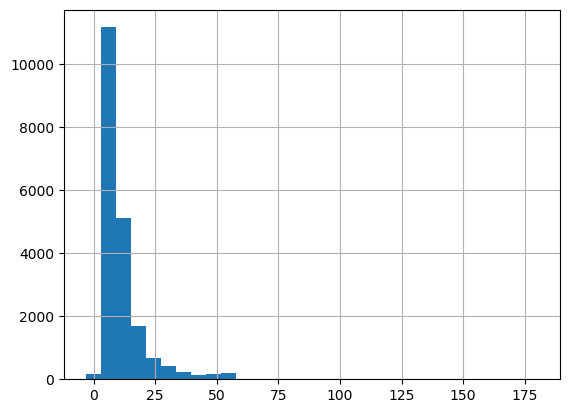

In [36]:
taxi_train_prep["fare_amount"].hist(bins=30)
plt.show()

In [38]:
# simplest method of regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=taxi_train_prep[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]],
      y=taxi_train_prep["fare_amount"])

features = ["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]

taxi_test_prep["fare_amount"] = lr.predict(taxi_test_prep[features])

In [47]:
# prepare submission
# kaggle ususally use CSV format with 2 columns: ID and target variable predicted
#taxi_test_prep.head()
taxi_prep_submission = taxi_test_prep[["id","fare_amount"]]

#save submission
taxi_prep_submission.to_csv("taxi_prep_first_sub.csv",index=False)

## 3. Store Item Demand Forecasting Challenge

In this competition, you are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items in 10 different stores.          

To begin, let's explore the train data for this competition. For the faster performance, you will work with a subset of the train data containing only a single month history.        

In [48]:
store_train = pd.read_csv("../DataCamp_Intro/Data/demand_forecasting_train_1_month.csv")

In [42]:
store_train.head()

,id,date,store,item,sales
0,100000,2017-12-01,1,1,19
1,100001,2017-12-02,1,1,16
2,100002,2017-12-03,1,1,31
3,100003,2017-12-04,1,1,7
4,100004,2017-12-05,1,1,20


In [43]:
store_train.shape

(15500, 5)

Having looked at the train data, let's explore the test data in the "Store Item Demand Forecasting Challenge". Remember, that the test dataset generally contains one column less than the train one.          

This column, together with the output format, is presented in the sample submission file. Before making any progress in the competition, you should get familiar with the expected output.         

That is why, let's look at the columns of the test dataset and compare it to the train columns.     

In [49]:
store_test = pd.read_csv("../DataCamp_Intro/Data/demand_forecasting_test.csv")

In [45]:
store_test.shape

(45000, 4)

In [28]:
# Print train and test columns
print('Train columns:', store_train.columns.tolist())
print('Test columns:', store_test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


Train a simple model    

As you determined, you are dealing with a regression problem. So, now you're ready to build a model for a subsequent submission. But now, instead of building the simplest Linear Regression model as in the slides, let's build an out-of-box Random Forest model.         

You will use the RandomForestRegressor class from the scikit-learn library.       

Your objective is to train a Random Forest model with default parameters on the "store" and "item" features.         

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=store_train[['store', "item"]], y=store_train["sales"])

# Get predictions for the test set
store_test['sales'] = rf.predict(store_test[['store', 'item']])

# Write test predictions using the sample_submission format
store_test[["id", "sales"]].to_csv('kaggle_submission.csv', index=False)

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train XGBoost models    

Every Machine Learning method could potentially overfit. You will see it on this example with XGBoost. Again, you are working with the Store Item Demand Forecasting Challenge. The train DataFrame is available in your workspace.      

Firstly, let's train multiple XGBoost models with different sets of hyperparameters using XGBoost's learning API. The single hyperparameter you will change is:        

max_depth - maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

In [51]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=store_train[['store', 'item']],
                     label=store_train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [52]:
# Create DMatrix on train data
dtrain = xgb.DMatrix(data=store_train[['store', 'item']],
                     label=store_train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [53]:
# Create DMatrix on train data
dtrain = xgb.DMatrix(data=store_train[['store', 'item']],
                     label=store_train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

In [56]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=store_train[['store', 'item']])
dtest = xgb.DMatrix(data=store_test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(store_train['sales'], train_pred)                  
    #mse_test = mean_squared_error(store_test['sales'], test_pred)
    #print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))
    print(mse_train)

331.064225020037
112.05701554210796
84.9521033381921
